In [1]:
from typing import Union

def colour_lerp(a: Union[tuple, list], b: Union[tuple, list], num_of_cols: int) -> tuple:
    """
    Colour linear interpolation between c1 and c2
    Uses the equation:
        Cr = Ar + t(Br - Ar)
        Cg = Ag + t(Bg - Ag)
        Cb = Ab + t(Bb - Ab)

        0.0 ≤ t ≤ 1.0

        Where:
            A is the start colour,
            B is the end colour,
            C is the interpolated colour

    :param a:
    :param b:
    :param num_of_cols:
    :return:
    """
    for t in range(num_of_cols + 1):
        t /= num_of_cols
        c = (a[0] + (t * (b[0] - a[0])), a[1] + (t * (b[1] - a[1])), a[2] + (t * (b[2] - a[2])))
        yield c

In [3]:
import handcalcs.render

In [4]:
%%render
# Long
A_r = 0
A_g = 128
A_b = 255

B_r = 255
B_g = 0
B_b = 0

t = 0.5 # Midpoint Colour

C_r = A_r + (t * (B_r - A_r))
C_g = A_g + (t * (B_g - A_g))
C_b = A_b + (t * (B_b - A_b))

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


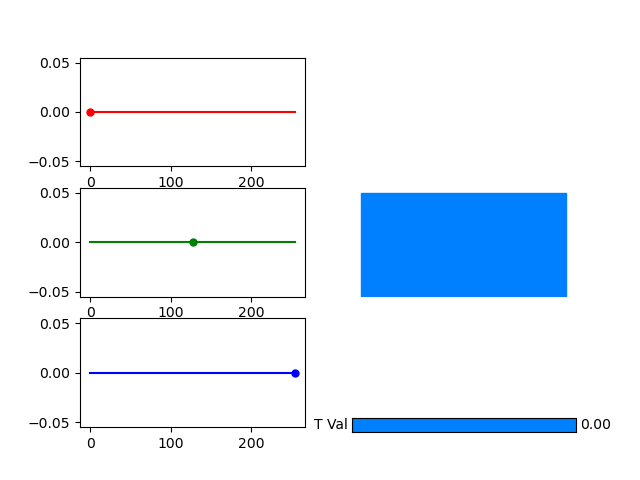

<IPython.core.display.Javascript object>


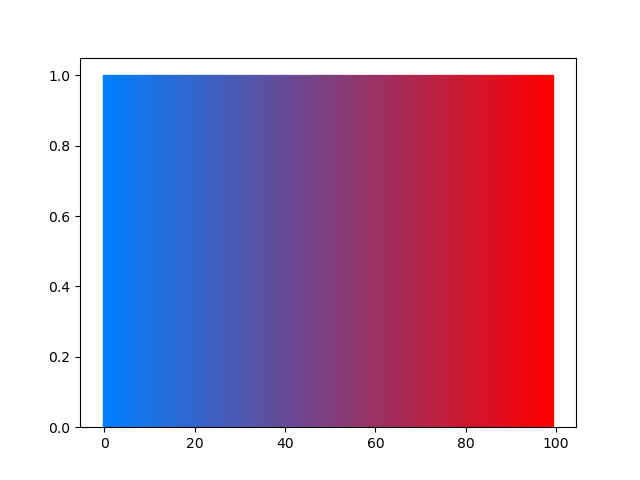

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


def rgb_to_hex(r, g, b):
    return f"#{int(r):02x}{int(g):02x}{int(b):02x}"
        

start_col = (A_r, A_g, A_b)
end_col = (B_r, B_g, B_b)

gradient = [(i, rgb_to_hex(*i)) for i in colour_lerp(start_col, end_col, 99)]

main_fig = plt.figure()
axr = main_fig.add_subplot(3, 2, 1)
axg = main_fig.add_subplot(3, 2, 3)
axb = main_fig.add_subplot(3, 2, 5)
axc = main_fig.add_subplot(3, 2, 4)
axc.axis("off")


red_line, = axr.plot([0, 255], [0, 0], "r-")
red_dot, = axr.plot(0, 0, marker="o", markersize=5, color="red")

green_line, = axg.plot([0, 255], [0, 0], "g-")
green_dot, = axg.plot(0, 0, marker="o", markersize=5, color="green")

blue_line, = axb.plot([0, 255], [0, 0], "b-")
blue_dot, = axb.plot(0, 0, marker="o", markersize=5, color="blue")

col_bar, = axc.bar(["colour"], [1], color="#F2A4E2")


slider_ax  = main_fig.add_axes([0.55, 0.1, 0.35, 0.03], facecolor=gradient[0][1])
slider = Slider(slider_ax, "T Val", 0, 1, valinit=0)

def sliders_on_change(val):
    col_bar.set_color(gradient[int(val * 100)][1])
    red_dot.set_xdata(gradient[int(val * 100)][0][0])
    green_dot.set_xdata(gradient[int(val * 100)][0][1])
    blue_dot.set_xdata(gradient[int(val * 100)][0][2])
    main_fig.canvas.draw_idle()

slider.on_changed(sliders_on_change)    


plt.figure(2)
bars = plt.bar([i for i in range(len(gradient))], [1])
for p, b in enumerate(bars):
    b.set_color(gradient[p][1])
plt.show()